In [10]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [29]:
df = pd.read_csv('final_data.csv')
df

,title,author,description,genres
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas..."
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPr (Illustrator)",There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ..."
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical..."
4,Twilight,Stephenie Meyer,About three things I was absolutely positive.F...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire..."
...,...,...,...,...
46972,Fractured,Cheri Schmidt (Goodreads Author),The Fateful Trilogy continues with Fractured. ...,"['Vampires', 'Paranormal', 'Young Adult', 'Rom..."
46973,Anasazi,Emma Michaels,"'Anasazi', sequel to 'The Thirteenth Chime' by...","['Mystery', 'Young Adult']"
46974,Marked,Kim Richardson (Goodreads Author),--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange..."
46975,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,"['Fiction', 'Mystery', 'Historical Fiction', '..."


# Trực quan hoá dữ liệu

In [23]:
# Tính tổng số lượng thể loại và số lần xuất hiện của mỗi thể loại đó
all_genres = [genre for genres_list in df['genres'] for genre in eval(genres_list)]
genre_counts = Counter(all_genres)
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
total_genres = len(genre_counts)
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

print(f'Total number of genres: {total_genres}')
print(genre_counts_df)

Total number of genres: 982
            Genre  Count
1         Fiction  31327
5         Romance  15406
3         Fantasy  14938
0     Young Adult  11791
41   Contemporary  10479
..            ...    ...
691        Malawi      1
892     Babylon 5      1
706   Polyamorous      1
713     Usability      1
981        Guinea      1

[982 rows x 2 columns]


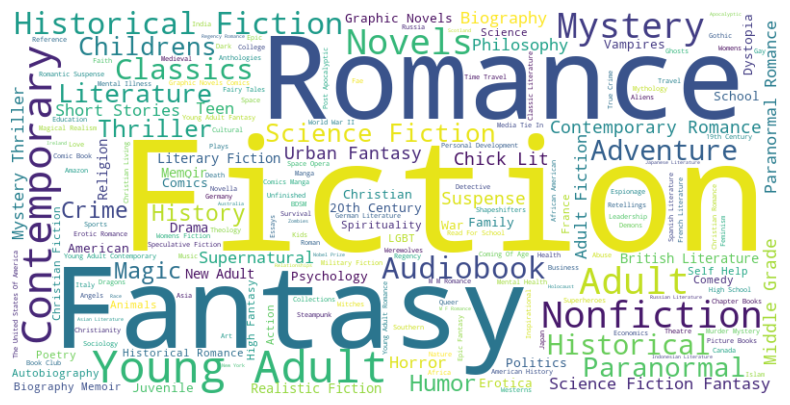

In [24]:
# Trực quan kết quả bằng WordCloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

# Hiển thị word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tắt trục
plt.show()

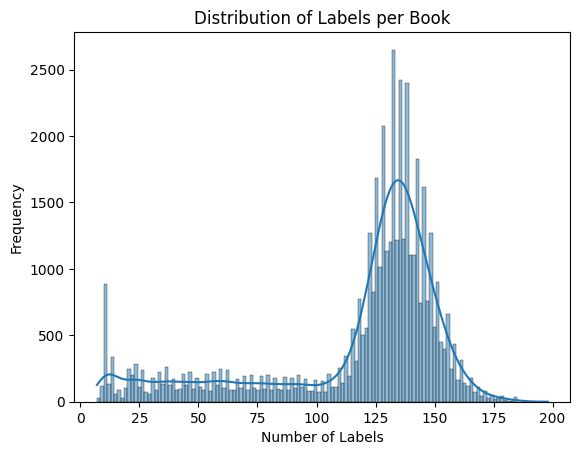

In [25]:
# Đếm số nhãn cho mỗi sách
label_counts = df['genres'].apply(len)

# Vẽ histogram
sns.histplot(label_counts, kde=True)
plt.title('Distribution of Labels per Book')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6872\3122942159.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=labels, palette="viridis")


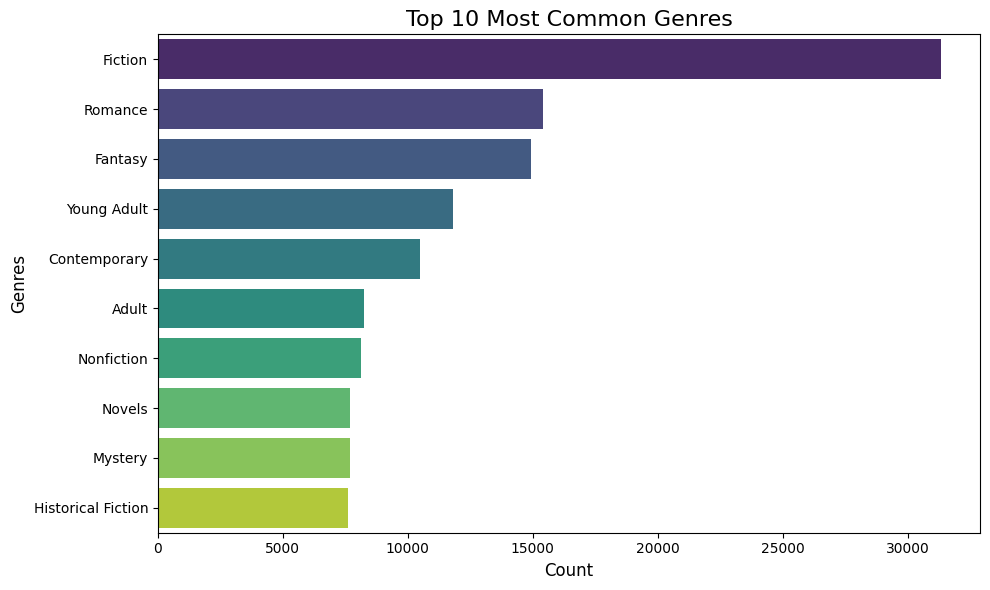

In [26]:
top_10_genres = genre_counts.most_common(10)

# Tách tên và số lượng
labels, values = zip(*top_10_genres)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=labels, palette="viridis")
plt.title("Top 10 Most Common Genres", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.tight_layout()
plt.show()

- Có quá nhiều nhãn và chênh lệch tần suất xuất hiện giữa các nhãn là khá lớn, có thể tạo khó khăn cho bài toán
- Nên tạo một ngưỡng tần suất hoặc gộp các nhãn hiếm lại để loại bỏ đi những nhãn xuất hiện ít lần, không mang nhiều ý nghĩa

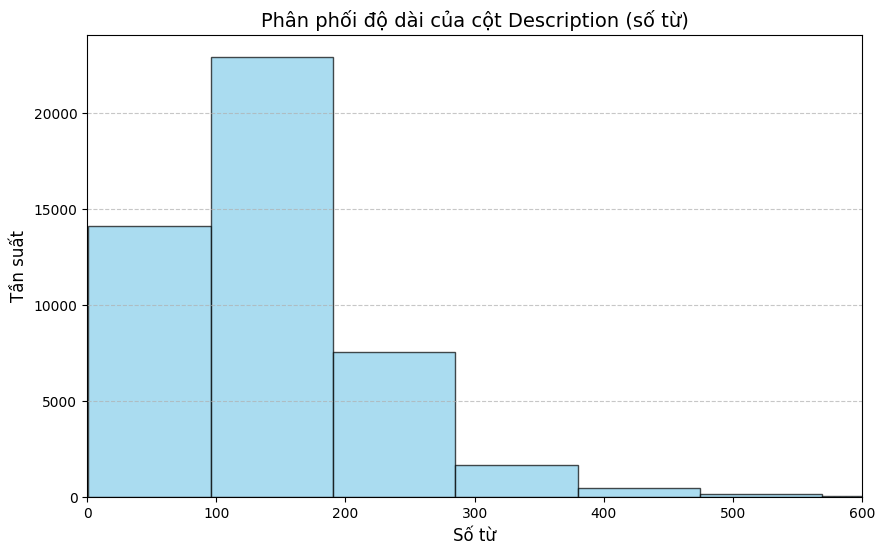

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['description_length'] = df['description'].str.split().apply(len)

# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
plt.hist(df['description_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Cài đặt tiêu đề và nhãn trục
plt.title('Phân phối độ dài của cột Description (số từ)', fontsize=14)
plt.xlabel('Số từ', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xlim(0, 600)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Độ dài phần mô tả của mỗi sách phân bố có chút không đồng đều. Cần chuẩn hoá độ dài để phù hợp cho bài toán